<a href="https://colab.research.google.com/github/saranpydev/SCT_DS_02/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
Sex:
 gender
Male      157
Female     87
Name: count, dtype: int6

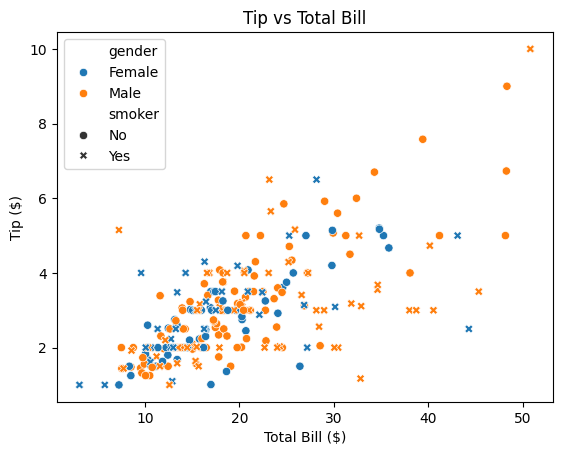

✅ Mean Squared Error (MSE): 0.9422737055102055
✅ R² Score: 0.2461637548142701

🧪 Sample Predictions:
      Actual Tip  Predicted Tip
24         3.18         2.7975
6          2.00         1.9666
153        2.00         3.7379
211        5.16         3.1666
198        2.00         1.9529
176        2.00         3.3073
192        2.56         4.3760
124        2.52         1.8237
9          3.23         2.2953
101        3.00         2.6138


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df=pd.read_csv('/content/tipsdataset.csv')

print("Shape:", df.shape)
print(df.info())
print(df.describe())




print("Sex:\n", df['gender'].value_counts(), "\nSmoker:\n", df['smoker'].value_counts(), "\nDay:\n", df['day'].value_counts())

sns.scatterplot(data=df, x='total_bill', y='tip', hue='gender', style='smoker')
plt.title("Tip vs Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.show()




# Encode categorical columns
le = LabelEncoder()
for col in ['gender', 'smoker', 'day', 'time']:
    df[col] = le.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop('tip', axis=1)
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)





# 📊 Features and target
X = df.drop('tip', axis=1)   # Features
y = df['tip']                # Target (tip amount)

# 🔀 Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 📈 Predict and evaluate
y_pred = model.predict(X_test)

# 🧾 Evaluation metrics
print("✅ Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("✅ R² Score:", r2_score(y_test, y_pred))

# 🔍 Show actual vs predicted
results = pd.DataFrame({'Actual Tip': y_test, 'Predicted Tip': y_pred})
print("\n🧪 Sample Predictions:\n", results.head(10))
